# Adiabatic Flame Example

This example uses `ctwrap` for one-dimensional adiabatic premixed flame simulations defined by the simulation module `adiabatic_flame` (`ctwrap.modules.adiabatic_flame`).

## 1. Function/Class Definitions

In [1]:
%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


In [2]:
import cantera as ct
import ctwrap as cw

## 2. Simulations

### 2.1 Create Simulation Object

Uses a module in the `modules` folder. Modules do not have to depend on `ctwrap`.

In [3]:
sim = cw.Simulation.from_module(cw.modules.adiabatic_flame)
sim

In [4]:
%%time
sim.run()

    defaults: mixture-averaged flamespeed = 0.711265 m/s
    defaults: multi-component flamespeed  = 0.727009 m/s
CPU times: user 338 ms, sys: 24.8 ms, total: 363 ms
Wall time: 386 ms


### 2.2 Create Simulation Handler

In [5]:
s = cw.SimulationHandler.from_yaml('adiabatic_flame.yaml', verbosity=1)
s

Simulations for entry `upstream.phi` with values: [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]


### 2.3 Run Simulation Tasks in Parallel

In [6]:
%%time
s.run_parallel(sim, verbosity=0)

    upstream.phi_0.6: mixture-averaged flamespeed = 0.924047 m/s
    upstream.phi_0.8: mixture-averaged flamespeed = 1.735133 m/s
    upstream.phi_0.6: multi-component flamespeed  = 0.934704 m/s
    upstream.phi_0.8: multi-component flamespeed  = 1.720514 m/s
    upstream.phi_1.0: mixture-averaged flamespeed = 2.322010 m/s
    upstream.phi_0.4: mixture-averaged flamespeed = 0.201058 m/s
    upstream.phi_1.0: multi-component flamespeed  = 2.289856 m/s
    upstream.phi_0.4: multi-component flamespeed  = 0.215256 m/s
    upstream.phi_1.2: mixture-averaged flamespeed = 2.716045 m/s
    upstream.phi_1.4: mixture-averaged flamespeed = 2.951101 m/s
    upstream.phi_1.2: multi-component flamespeed  = 2.671883 m/s
    upstream.phi_1.4: multi-component flamespeed  = 2.899580 m/s
    upstream.phi_1.8: mixture-averaged flamespeed = 3.045410 m/s
    upstream.phi_1.8: multi-component flamespeed  = 2.992115 m/s
    upstream.phi_1.6: mixture-averaged flamespeed = 3.051486 m/s
    upstream.phi_1.6: mul

True

## 3. Create Graphical Output

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl

col = mpl.rcParams['axes.prop_cycle'].by_key()['color']
n_col = len(col)

### 3.1 Load Data

In [8]:
# load data from output file
data = cw.fileio.from_hdf(s.output_name)
# data.keys()

In [9]:
mix = {k.split('<')[0]: data[k] for k in data if 'mix' in k}
mlt = {k.split('<')[0]: data[k] for k in data if 'multi' in k}

tasks = data.get('variation')['tasks']
phi = data.get('variation')['values']
# tasks, phi

In [10]:
up = data.get('defaults')['upstream']
# up

### 3.2 Plot

Plot flame speeds and temperature profiles

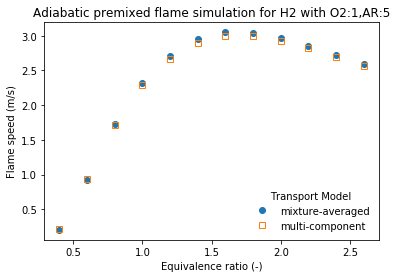

In [11]:
# create figure
fig, ax = plt.subplots(1)

# plot results
u_mix = [ mix[t]['u (m/s)'][0] for t in tasks]
u_mlt = [ mlt[t]['u (m/s)'][0] for t in tasks]

ax.plot(phi, u_mix, marker='o', 
            linestyle='none', label='mixture-averaged') 
ax.plot(phi, u_mlt, marker='s', 
            markerfacecolor='none',
            linestyle='none', label='multi-component') 

# add title/axis labels
ax.set_xlabel('Equivalence ratio (-)')
ax.set_ylabel('Flame speed (m/s)')

ax.set_title('Adiabatic premixed flame simulation for {} with {}'.format(up['fuel'],up['oxidizer']))

# add legend
leg = ax.legend(loc='lower right',#prop={'size':11},
                title='Transport Model') # % mech)
_ = leg.draw_frame(False) 

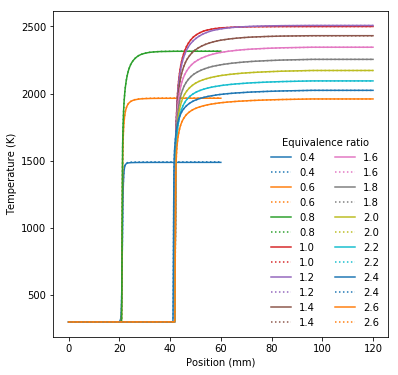

In [12]:
# create figure and adjust size
fig, ax = plt.subplots(1)
fig.set_size_inches(6.,6.)

# plot results
for i, key in enumerate(tasks):
    df = mix[key]
    label = key.split('_')[1]
    ax.plot(1000*df['z (m)'], df['T (K)'], color=col[i % n_col], 
            linestyle='-', label=label) 
    df = mlt[key]
    ax.plot(1000*df['z (m)'], df['T (K)'], color=col[i % n_col], 
            linestyle=':', label=label) 

# add title/axis labels
ax.set_xlabel('Position (mm)')
ax.set_ylabel('Temperature (K)')

# add legend
leg = ax.legend(loc='lower right',#prop={'size':11},
                title='Equivalence ratio', ncol=2) # % mech)
_ = leg.draw_frame(False) 